In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading Datasets

tracks = pd.read_csv('tracks.csv')
artists = pd.read_csv('artists.csv')

In [3]:
#viewing the tracks data
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


In [4]:
#viewing the artists data
artists.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0.0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0.0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0.0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0.0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0.0


In [5]:
tracks.shape

(122860, 20)

In [6]:
artists.shape

(415086, 5)

In [7]:
# identifying null

pd.isnull(tracks).sum()

,0
id,0
name,0
popularity,0
duration_ms,0
explicit,0
artists,0
id_artists,0
release_date,0
danceability,0
energy,0


In [8]:
tracks['name'] = tracks['name'].fillna("Unknown Tracks")
pd.isnull(tracks).sum()

,0
id,0
name,0
popularity,0
duration_ms,0
explicit,0
artists,0
id_artists,0
release_date,0
danceability,0
energy,0


In [9]:
pd.isnull(artists).sum()

,0
id,0
followers,1
genres,1
name,2
popularity,1


In [10]:
artists['name'] = artists['name'].fillna('Unknown Artists')
artists['followers'] = artists['followers'].fillna(artists['followers'].median())

In [11]:
pd.isnull(artists).sum()

,0
id,0
followers,0
genres,1
name,0
popularity,1


In [12]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122860 entries, 0 to 122859
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                122860 non-null  object 
 1   name              122860 non-null  object 
 2   popularity        122860 non-null  int64  
 3   duration_ms       122860 non-null  int64  
 4   explicit          122860 non-null  int64  
 5   artists           122860 non-null  object 
 6   id_artists        122860 non-null  object 
 7   release_date      122860 non-null  object 
 8   danceability      122860 non-null  float64
 9   energy            122860 non-null  float64
 10  key               122860 non-null  int64  
 11  loudness          122860 non-null  float64
 12  mode              122860 non-null  int64  
 13  speechiness       122860 non-null  float64
 14  acousticness      122860 non-null  float64
 15  instrumentalness  122860 non-null  float64
 16  liveness          12

In [13]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415086 entries, 0 to 415085
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          415086 non-null  object 
 1   followers   415086 non-null  float64
 2   genres      415085 non-null  object 
 3   name        415086 non-null  object 
 4   popularity  415085 non-null  float64
dtypes: float64(2), object(3)
memory usage: 15.8+ MB


In [14]:
# Transformation

tracks.set_index('release_date', inplace=True)
tracks.index = pd.to_datetime(tracks.index, errors='coerce', format='mixed')
years = tracks.index.year
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


In [15]:
tracks['duration'] = tracks['duration_ms'].apply (lambda x : round(x/1000))
tracks.drop('duration_ms', inplace = True, axis=1)
tracks.duration.head()

,duration
release_date,
1922-02-22,127
1922-06-01,98
1922-03-21,182
1922-03-21,177
1922-01-01,163


In [16]:
# Descriptive Stats

tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,122860.0,29.807822,23.845931,0.0,4.0000,32.000000,49.0000,100.000
explicit,122860.0,0.042984,0.202822,0.0,0.0000,0.000000,0.0000,1.000
danceability,122860.0,0.546287,0.171356,0.0,0.4280,0.559000,0.6750,0.988
energy,122860.0,0.481797,0.265474,0.0,0.2580,0.465000,0.7010,1.000
key,122860.0,5.198071,3.509724,0.0,2.0000,5.000000,8.0000,11.000
loudness,122860.0,-11.502333,5.495220,-60.0,-14.5510,-10.638000,-7.4060,4.584
mode,122860.0,0.696240,0.459882,0.0,0.0000,1.000000,1.0000,1.000
speechiness,122860.0,0.100529,0.175300,0.0,0.0347,0.044700,0.0731,0.970
acousticness,122860.0,0.511312,0.375047,0.0,0.1100,0.541000,0.8980,0.996
instrumentalness,122860.0,0.176722,0.320730,0.0,0.0000,0.000271,0.1400,1.000


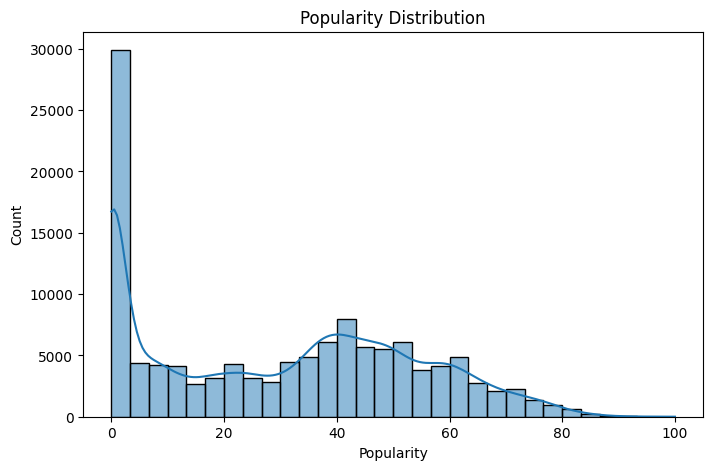

In [17]:
# Popularitry Distribution

plt.figure(figsize=(8,5))
sns.histplot(tracks['popularity'], bins=30, kde = True)
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

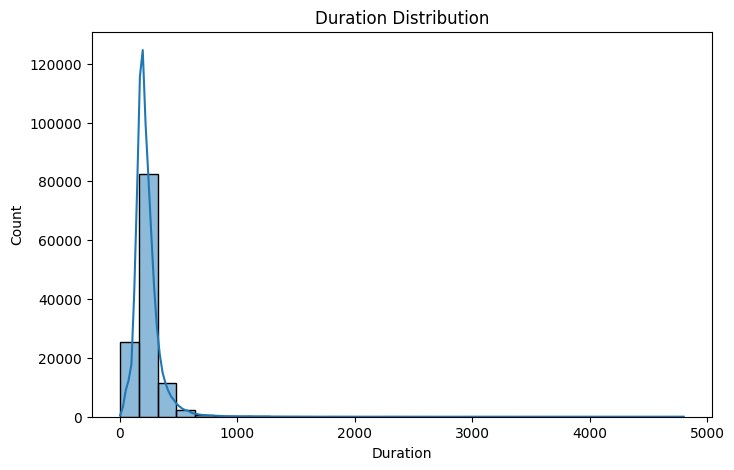

In [18]:
# Duration Distribution

plt.figure(figsize=(8,5))
sns.histplot(tracks['duration'], bins=30, kde = True)
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

In [19]:
# Top 10 popular songs

top = tracks.sort_values('popularity',ascending=False).head(10)
top[['name','popularity']]

,name,popularity
release_date,,
2021-03-19,Peaches (feat. Daniel Caesar & Giveon),100
2021-01-08,drivers license,99
2021-01-06,Astronaut In The Ocean,98
2020-12-04,telepatía,97
2020-03-20,Save Your Tears,97
2021-03-05,Leave The Door Open,96
2020-03-20,Blinding Lights,96
2020-09-16,The Business,95
2020-12-10,Bandido,94


In [20]:
# Bottom 10 popular songs

bottom = tracks.sort_values('popularity',ascending=True).head(10)
bottom[['name','popularity']]

,name,popularity
release_date,,
1922-01-01,La Butte Rouge,0
1922-01-01,Till the End of Time,0
1922-06-01,Capítulo 2.7 - Banquero Anarquista,0
1922-03-21,No Me Olvides - Remasterizado,0
1922-01-01,L'amour Au Clair De Lune,0
1922-03-21,Toda Alma - Remasterizado,0
1922-01-06,Chapter 1.5 - Szkolne przygody Pimpusia Sadełko,0
1922-03-29,Practicante - Remasterizado,0
1922-03-29,Mi Guitarra - Remasterizado,0


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'explicit'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'key'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'mode'),
 Text(7.5, 0, 'speechiness'),
 Text(8.5, 0, 'acousticness'),
 Text(9.5, 0, 'instrumentalness'),
 Text(10.5, 0, 'liveness'),
 Text(11.5, 0, 'valence'),
 Text(12.5, 0, 'tempo'),
 Text(13.5, 0, 'time_signature'),
 Text(14.5, 0, 'duration')]

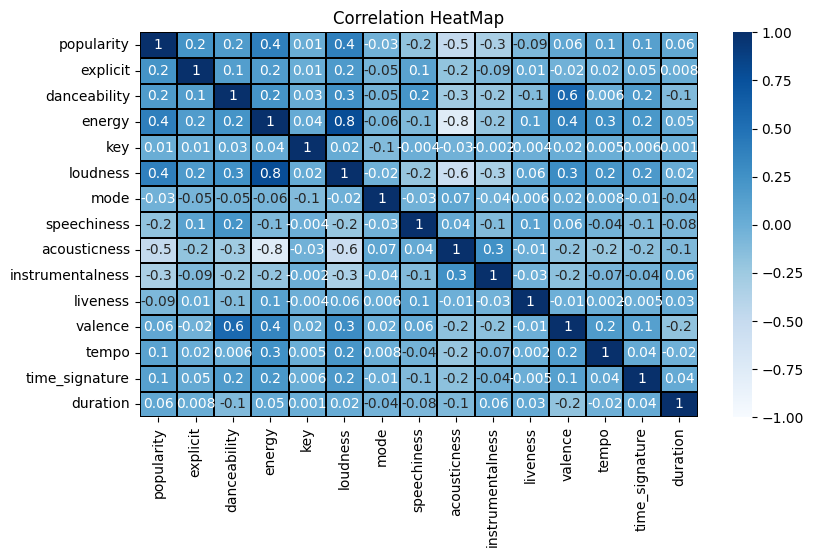

In [21]:
# Correlation Heatmap

corr = tracks.select_dtypes(include = 'number').corr(method='pearson')
plt.figure(figsize=(9,5))
hmap = sns.heatmap(corr, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=0.1, linecolor='black')
hmap.set_title('Correlation HeatMap')
hmap.set_xticklabels(hmap.get_xticklabels(), rotation=90)

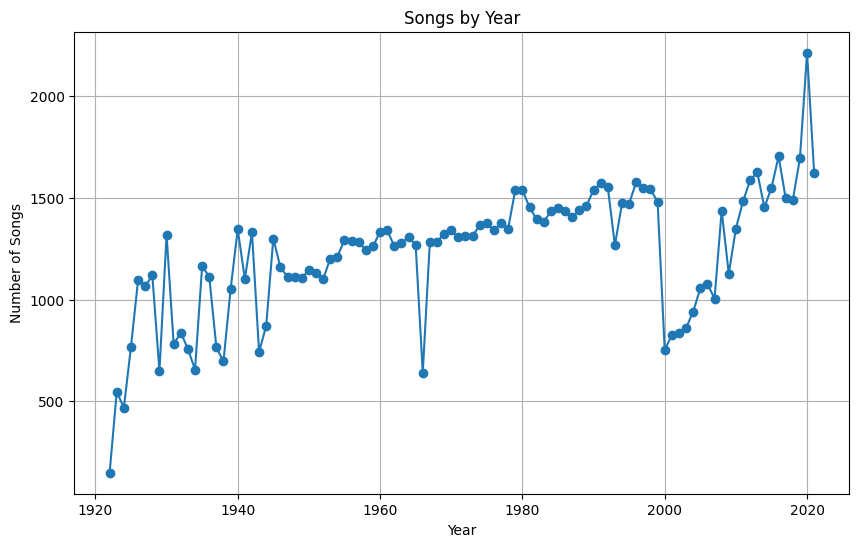

In [22]:
# songs by year

songs_by_year = tracks.groupby(years)['name'].count()

plt.figure(figsize=(10, 6))
plt.plot(songs_by_year.index, songs_by_year.values, marker='o')
plt.title('Songs by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()

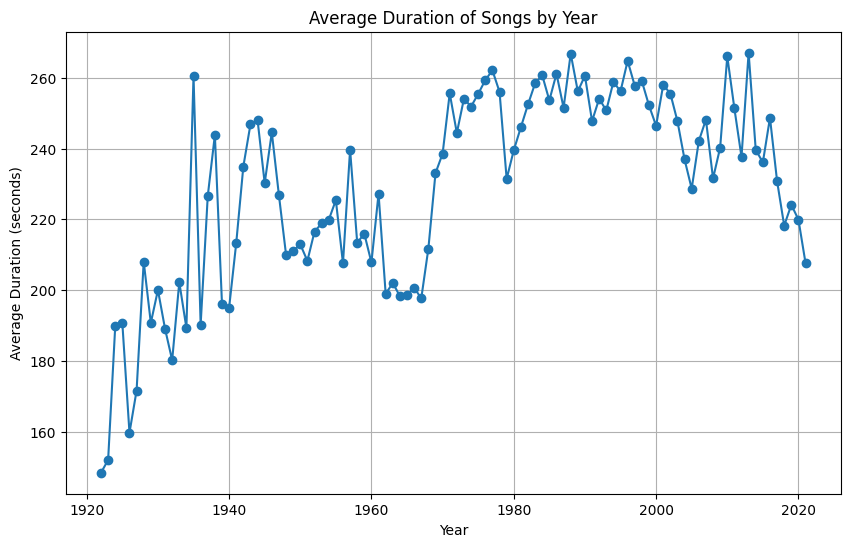

In [23]:
# Average duration of songs by year

avg_duration_by_year = tracks.groupby(years)['duration'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_duration_by_year.index, avg_duration_by_year.values, marker='o')
plt.title('Average Duration of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (seconds)')
plt.grid(True)
plt.show()

In [24]:
# merge the dataset

tracks['id_artists_clean'] = tracks['id_artists'].str.strip("[]'\"").str.split(',').str[0]
df = tracks.merge(artists[['id', 'genres']], left_on='id_artists_clean', right_on='id')



In [25]:
df.head()

,id_x,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,id_artists_clean,id_y,genres
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,...,0.674,0.7440,0.151,0.127,104.851,3.0,127,45tIt06XoI0Iio4LBEVpls,45tIt06XoI0Iio4LBEVpls,[]
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,...,0.797,0.0000,0.148,0.655,102.009,1.0,98,14jtPCOoNZwquk5wd9DxrY,14jtPCOoNZwquk5wd9DxrY,[]
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,...,0.994,0.0218,0.212,0.457,130.418,5.0,182,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']"
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,...,0.995,0.9180,0.104,0.397,169.980,3.0,177,5LiOoJbxVSAMkBS2fUm3X2,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']"
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,...,0.989,0.1300,0.311,0.196,103.220,4.0,163,3BiJGZsyX9sJchTqcSA7Su,3BiJGZsyX9sJchTqcSA7Su,"['adult standards', 'big band', 'easy listenin..."


Text(0, 0.5, 'Average Popularity')

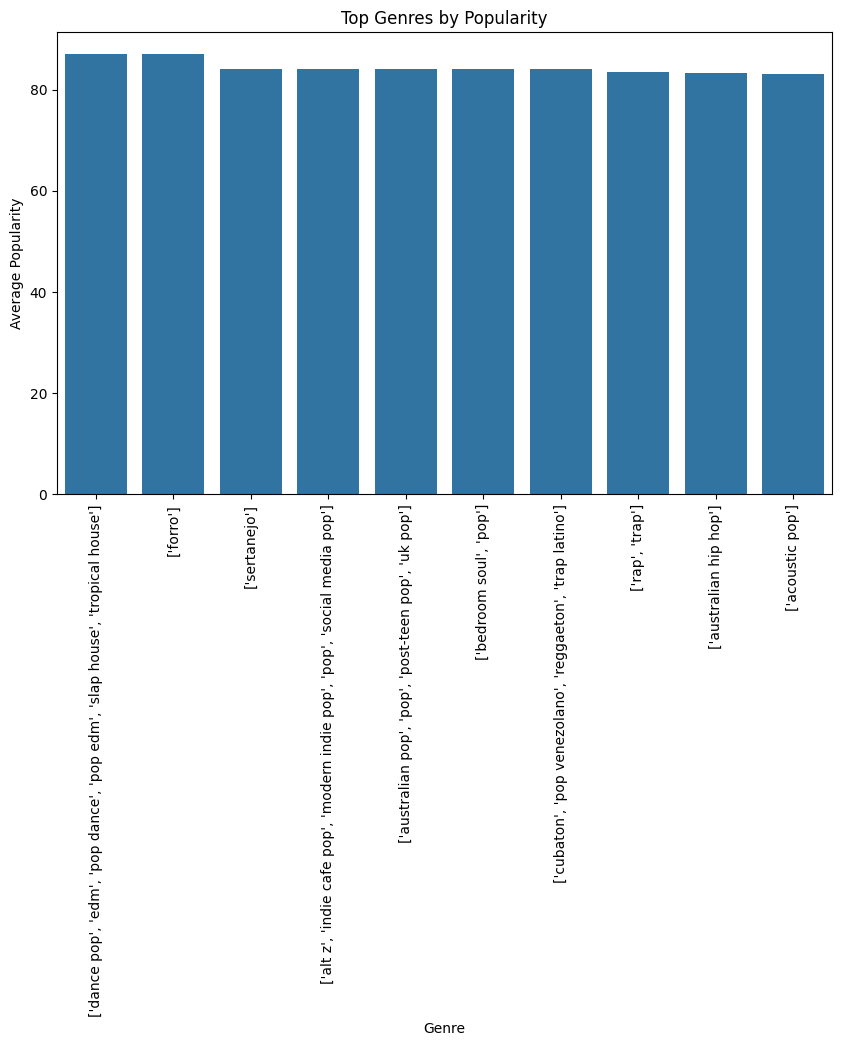

In [26]:
# top genres by populatity

genre_popularity = df.groupby('genres')['popularity'].mean().sort_values(ascending=False)
top_genre = genre_popularity.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_genre.index, y=top_genre.values)
plt.title('Top Genres by Popularity')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel('Average Popularity')

Text(0, 0.5, 'Duration (seconds)')

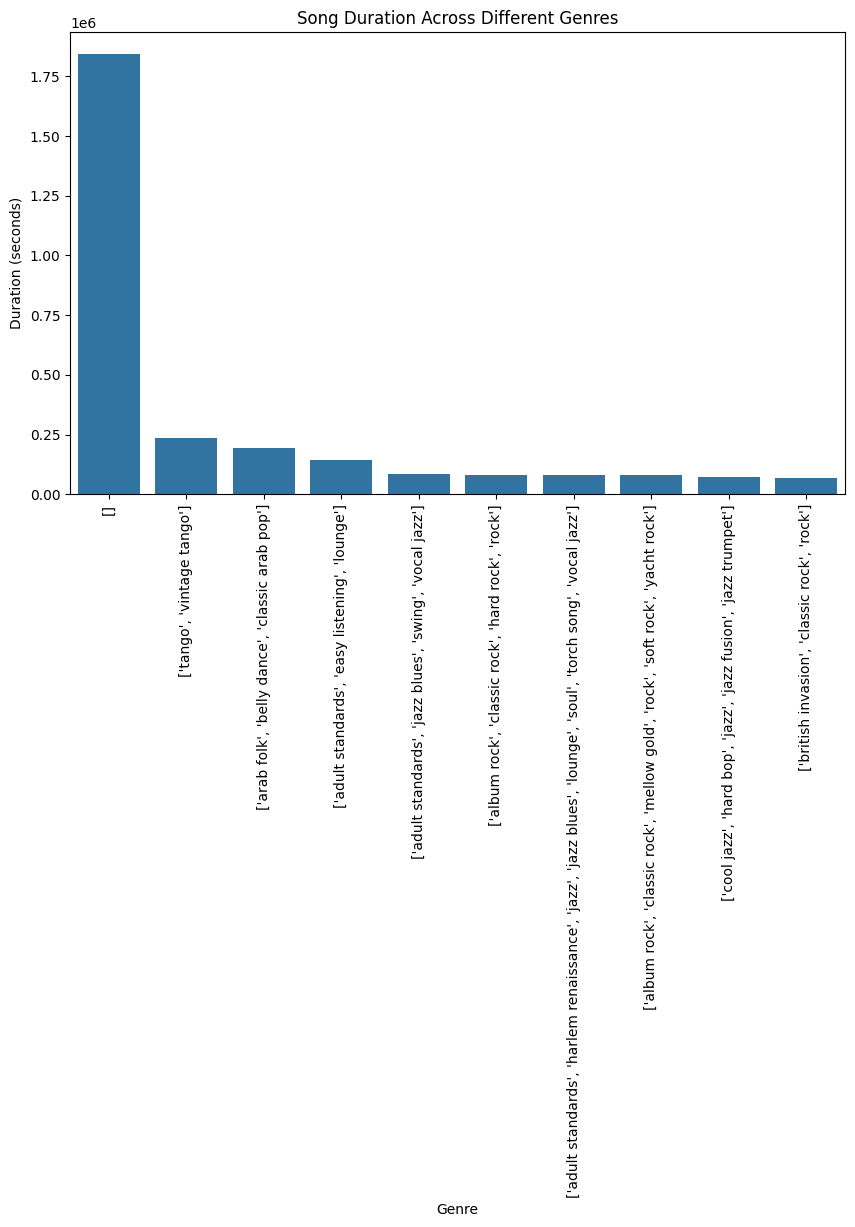

In [27]:
# song duration across each genre

top_genres_duration = df.groupby('genres')['duration'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres_duration.index, y=top_genres_duration.values)
plt.title('Song Duration Across Different Genres')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel('Duration (seconds)')

In [28]:
# Create 10% sample dataset

sample_df = tracks.sample(frac=0.05, random_state=42)
sample_df.shape

(6143, 20)

[Text(0.5, 1.0, 'Regression Plot - Popularity vs Acousticness Correlation')]

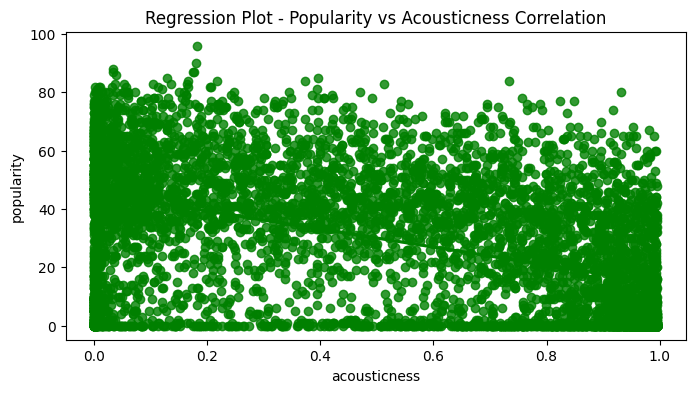

In [29]:
# Regression plot on sample data

plt.figure(figsize=(8,4))
sns.regplot(data=sample_df, y='popularity', x='acousticness', color='#008000').set(title='Regression Plot - Popularity vs Acousticness Correlation')

[Text(0.5, 1.0, 'Regression Plot - Loudness vs Energy Correlation')]

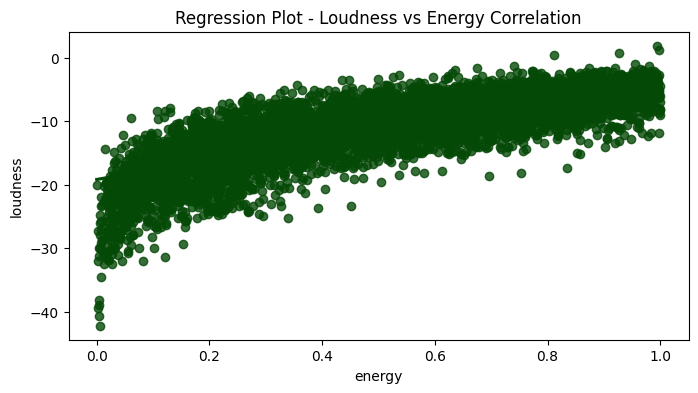

In [30]:
# Loudness vs Energy

plt.figure(figsize=(8,4))
sns.regplot(data=sample_df, y='loudness', x='energy', color='#054907').set(title='Regression Plot - Loudness vs Energy Correlation')

[Text(0.5, 1.0, 'Regression Plot - Loudness vs Energy Correlation')]

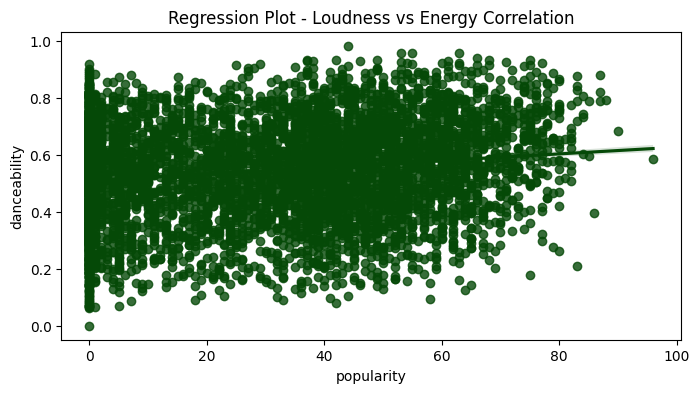

In [31]:
# Popularity vs Dancebility

plt.figure(figsize=(8,4))
sns.regplot(data=sample_df, y='danceability', x='popularity', color='#054907').set(title='Regression Plot - Loudness vs Energy Correlation')